In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import gym_trading_env
import random
from data_preprocessing import GetData, CleanData
from technical_analysis import AddIndicators, Discretize

In [2]:
data_get = GetData()
data_cleaner = CleanData()
indicator_adder = AddIndicators()
discretizer = Discretize( num_states = 10, window = 100 )

Fazendo download e limpando a base de dados.

In [3]:
ticker = "ITUB4.SA"
start_date = "2010-01-01"
end_date = "2024-12-01"

data = data_get.from_yfinance( ticker, start_date, end_date )

data_cleaner.cleaning( data )

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,close,high,low,open,volume
date,,,,,
2010-01-04,9.378521,9.465013,9.090994,9.090994,11843397
2010-01-05,9.439307,9.439307,9.327101,9.401905,8593315
2010-01-06,9.357495,9.465026,9.280354,9.408922,10602572
2010-01-07,9.261646,9.362164,9.245282,9.292034,9966567
2010-01-08,9.121384,9.299042,9.098008,9.299042,9748709
...,...,...,...,...,...
2024-11-25,32.171093,32.274871,32.048449,32.161660,23845800
2024-11-26,32.784328,33.171136,32.237135,32.265441,26712200
2024-11-27,31.982407,32.878666,31.812588,32.718284,23668200


Adicionando os indicadores técnicos

In [4]:
data = indicator_adder.add_indicator( data, indicator_name = "rsi", close = data["close"], window = 14 )

# data = indicator_adder.add_indicator( data, indicator_name = "sma", close = data["close"], 
#                                      window = 14 )

data = indicator_adder.add_indicator( data, indicator_name = "macd", close = data["close"], window_slow=26,
                                      window_fast=12, window_sign=9 )

## Também podem ser utilizadas as bollinger bands.

In [5]:
data = data.dropna()


In [6]:
data = discretizer.process_indicator( data, column_name = "rsi", base_name = "rsi" )
# data = discretizer.process_indicator( data, column_name = "sma", base_name = "sma" )
data = discretizer.process_indicator( data, column_name = "macd_signal", base_name = "macd_signal" )

/home/gabriel/Downloads/Q-Learning-Trading-Agent-in-Gym-main/technical_analysis.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[zscore_column] = self.calculate_zscore( data[column_name] )
/home/gabriel/Downloads/Q-Learning-Trading-Agent-in-Gym-main/technical_analysis.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[discrete_column] = self.rolling_discretize( data[zscore_column] )
/home/gabriel/Downloads/Q-Learning-Trading-Agent-in-Gym-main/technical_analysis.py:149: SettingWithCopyWarni

In [7]:
data

Price,close,high,low,open,volume,rsi,macd,macd_signal,macd_diff,rsi_zscore,feature_rsi_discrete,macd_signal_zscore,feature_macd_signal_discrete
date,,,,,,,,,,,,,
2010-02-23,8.417763,8.532306,8.321921,8.501917,7313179,41.826834,-0.070521,-0.106605,0.036084,-0.855024,0,-0.438878,0
2010-02-24,8.324262,8.450494,8.300886,8.415429,8594852,39.499252,-0.087229,-0.102730,0.015501,-1.050013,0,-0.427765,0
2010-02-25,8.321923,8.469193,8.146602,8.181666,8120923,39.440139,-0.099513,-0.102086,0.002574,-1.054965,0,-0.425919,0
2010-02-26,8.532310,8.532310,8.261146,8.345300,14776575,47.109318,-0.091219,-0.099913,0.008694,-0.412493,0,-0.419686,0
2010-03-01,8.546333,8.623475,8.522957,8.590748,8356789,47.585799,-0.082563,-0.096443,0.013880,-0.372576,0,-0.409735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,32.171093,32.274871,32.048449,32.161660,23845800,38.776301,-0.320895,-0.213578,-0.107317,-1.110577,0,-0.745661,0
2024-11-26,32.784328,33.171136,32.237135,32.265441,26712200,47.951512,-0.283703,-0.227603,-0.056100,-0.341939,3,-0.785883,0
2024-11-27,31.982407,32.878666,31.812588,32.718284,23668200,39.594980,-0.315302,-0.245143,-0.070159,-1.041993,0,-0.836185,0


Primeiro, vamos testar o Q-Learning para apenas uma ação.

### Agora, podemos começar a mexer com o ambiente e o Q-Learning
- Ações: (-1, 0, 1)
 - -1 : Short (está vendido)
 - 0 : Neutro
 - 1 : Long (está comprado)

In [8]:
cutoff = int( len( data ) * 0.85 )

data_train = data.iloc[:cutoff]
data_test = data.iloc[cutoff:]


In [9]:
def custom_reward_function(history):
    """
    Calcula a recompensa como sendo a diferença entre o preço do dia atual e do dia anterior,
    multiplicado pelo valor da ação.

    Fórmula da recompensa:
    rt = (price_t+1 - price_t) * action_t
    """
    t = history["step", -1]  # Pegando o último timestep
    t_minus_1 = t - 1  # Pegando o timestep anterior

    price_t = history["data_close", t_minus_1]  # Preço no timestep anterior
    price_t_plus_1 = history["data_close", t]  # Preço no timestep atual
    action_t = history["position_index", t]  # Ação tomada no timestep atual

    if action_t == 0:
        reward = (price_t_plus_1 - price_t) * -1  # Se ação for 0 (vender), penaliza se o preço subir
    elif action_t == 1:
        reward = 0  # Se ação for neutra, recompensa é 0
    else:
        reward = (price_t_plus_1 - price_t) * 1  # Se ação for comprar, recompensa positiva se preço subir

    return reward


In [10]:
env_train = gym.make( "TradingEnv",
                name = "AAPL",
                positions = [-1, 0 , 1],
                df = data_train,
                dynamic_feature_functions = [],
                trading_fees = 0.01 / 100,
                borrow_interest_rate = 0.0003 / 100,
                reward_function = custom_reward_function
                )

In [11]:
STATE_SPACE = env_train.observation_space.shape[0]
ACTION_SPACE = env_train.action_space.n

new_row = np.zeros( [1, ACTION_SPACE] )

q_table = np.copy( new_row )

q_map = {0:0}

In [12]:
print( STATE_SPACE )

2


In [13]:
##Printando a Q-table e Q-map
def print_q( q_table, q_map ):
    print( f"The Q-Table is {q_table}" )
    print( f"The Q-Mapping is {q_map}" )

print_q( q_table, q_map )

The Q-Table is [[0. 0. 0.]]
The Q-Mapping is {0: 0}


In [14]:
def get_action( q_table, state_row, random_rate ):
    if random.random() < random_rate:
        return random.choice( [ -1, 0, 1 ] )
    action_values = q_table[state_row]
    max_indexes = np.argwhere( action_values == action_values.max() ).flatten()
    return np.random.choice( max_indexes )

In [15]:
def update_q( q_table, new_state_row, reward, old_value, learning_rate = 0.0001, DISCOUNT = 0.9 ):
    return old_value + learning_rate * ( reward + DISCOUNT * np.max(q_table[new_state_row]) - old_value )

In [16]:
def train_qlearning( env, episodes, q_table, q_map, random_rate, learning_rate=0.0001, DISCOUNT=0.9, render = False ):
    """
    Treina um agente utilizando o algoritmo de Q-learning.
    
    Args:
        env (gym.Env): O ambiente no qual o agente será treinado.
        episodes (int): Número de episódios para o treinamento.
        q_table (np.ndarray): Tabela de Q-valores.
        q_map (dict): Mapeamento de estados para índices na q_table.
        random_rate (float): Taxa de exploração (ε) que define a probabilidade de escolher uma ação aleatória.
        learning_rate (float, opcional): Taxa de aprendizado (alpha). Padrão é 0.1.
        DISCOUNT (float, opcional): Fator de desconto (gamma) para recompensas futuras. Padrão é 0.9.
        render (bool, opcional): Se True, renderiza o ambiente. Padrão é False.
    
    Returns:
        np.ndarray: Tabela Q atualizada.
        list: Recompensas acumuladas em cada episódio.
    """
    
    rewards = []
    for i in range( episodes ):

        state, _ = env.reset()
        state = tuple( np.array( state ).flatten() )

        step = 0
        terminated = False
        truncated = False
        total_reward = 0

        while not ( terminated or truncated ):
            if state not in q_map:
                new_row = np.zeros( ( 1, q_table.shape[1] ) )
                q_table = np.append( q_table, new_row, axis=0 )
                q_map[state] = len( q_table ) - 1

            state_row = q_map[state]
            action = get_action( q_table, state_row, random_rate )
            new_state, reward, terminated, truncated, info = env.step( action )
            new_state = tuple( np.array( new_state ).flatten() )

            if new_state not in q_map:
                new_row = np.zeros( ( 1, q_table.shape[1] ) )
                q_table = np.append( q_table, new_row, axis=0 )
                q_map[new_state] = len( q_table ) - 1
                
            new_state_row = q_map[new_state]
            total_reward += reward

            current_q = q_table[state_row, action]
            q_table[state_row, action] = update_q( q_table, new_state_row, reward, current_q, learning_rate, DISCOUNT )

            step += 1
            state = new_state
        random_rate = max( 0.05, random_rate * 0.995 )
        rewards.append( total_reward )
        
    return q_table, rewards


In [17]:
q_table = np.zeros( [1, ACTION_SPACE] )
q_map = {}
random_rate = 1.0
q_table, rewards = train_qlearning( env_train, episodes = 1000, q_table = q_table, q_map = q_map, random_rate = random_rate, render = True )

Market Return : 163.06%   |   Portfolio Return : 18.12%   |   
Market Return : 163.06%   |   Portfolio Return : 104.08%   |   
Market Return : 163.06%   |   Portfolio Return : -91.95%   |   
Market Return : 163.06%   |   Portfolio Return : -17.44%   |   
Market Return : 163.06%   |   Portfolio Return : -33.53%   |   
Market Return : 163.06%   |   Portfolio Return : 220.05%   |   
Market Return : 163.06%   |   Portfolio Return : -60.26%   |   
Market Return : 163.06%   |   Portfolio Return : 192.95%   |   
Market Return : 163.06%   |   Portfolio Return : -92.66%   |   
Market Return : 163.06%   |   Portfolio Return : -88.81%   |   
Market Return : 163.06%   |   Portfolio Return : -10.59%   |   
Market Return : 163.06%   |   Portfolio Return : -69.86%   |   
Market Return : 163.06%   |   Portfolio Return : 139.69%   |   
Market Return : 163.06%   |   Portfolio Return : 58.45%   |   
Market Return : 163.06%   |   Portfolio Return : -45.29%   |   
Market Return : 163.06%   |   Portfolio Re

In [18]:
# Número de estados e ações no Q-Table
num_states, num_actions = q_table.shape
print( f"Number of states: {num_states}, Number of actions: {num_actions}" )


Number of states: 99, Number of actions: 3


In [19]:
def plot_performance( rewards ):
    """
    Plota as recompensas acumuladas ao longo dos episódios e calcula as estatísticas de desempenho.
    
    Parâmetros:
    - rewards (list): Lista de recompensas totais por episódio.
    """
    
    episodes = np.arange( len( rewards ) ) + 1
    cumulative_rewards = np.cumsum( rewards )

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot( episodes, rewards, label='Recompensa Total por Episódio' )
    plt.xlabel( 'Episódio' )
    plt.ylabel( 'Recompensa Total' )
    plt.title( 'Recompensa Total por Episódio' )
    plt.legend()
    plt.grid( True )

    plt.subplot( 2, 1, 2 )
    plt.plot( episodes, cumulative_rewards, label='Recompensa Acumulada', color='orange' )
    plt.xlabel( 'Episódio' )
    plt.ylabel( 'Recompensa Acumulada' )
    plt.title( 'Recompensa Acumulada ao Longo dos Episódios' )
    plt.legend()
    plt.grid( True )

    plt.tight_layout()
    plt.show()

    average_reward = np.mean( rewards )
    std_reward = np.std( rewards )
    total_cumulative_reward = cumulative_rewards[-1]
    max_reward = np.max( rewards )
    min_reward = np.min( rewards )

    print( "Análise de Desempenho:" )
    print( f"- Recompensa Média por Episódio: {average_reward:.2f}" )
    print( f"- Desvio Padrão da Recompensa: {std_reward:.2f}" )
    print( f"- Recompensa Acumulada Total: {total_cumulative_reward:.2f}" )
    print( f"- Máxima Recompensa em um Episódio: {max_reward:.2f}" )
    print( f"- Mínima Recompensa em um Episódio: {min_reward:.2f}" )


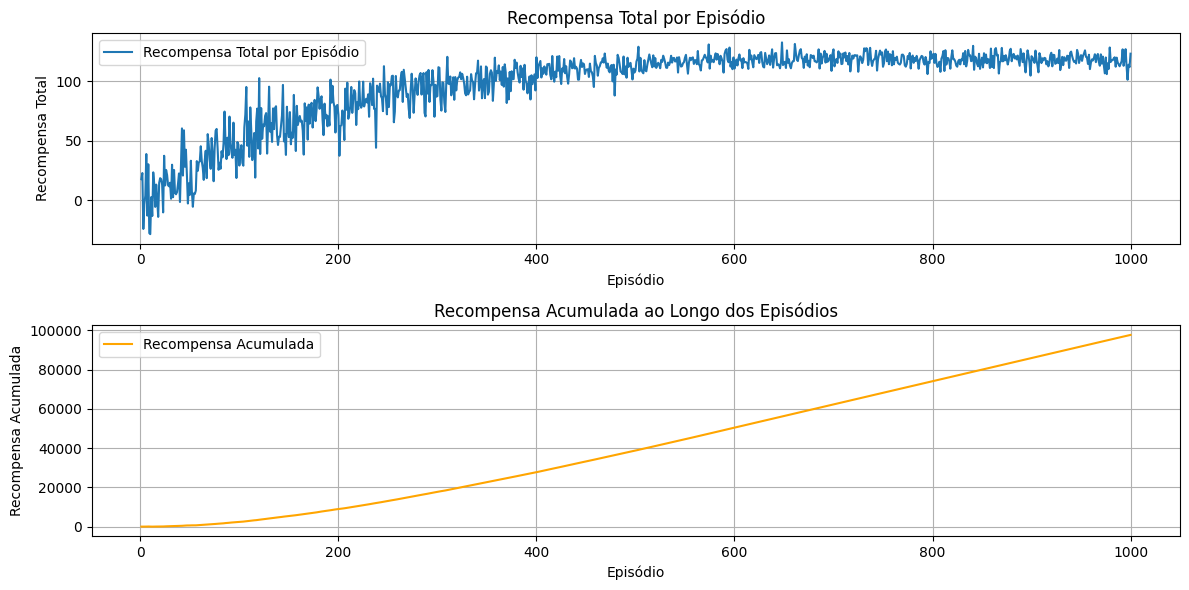

Análise de Desempenho:
- Recompensa Média por Episódio: 97.64
- Desvio Padrão da Recompensa: 31.53
- Recompensa Acumulada Total: 97641.14
- Máxima Recompensa em um Episódio: 132.38
- Mínima Recompensa em um Episódio: -28.28


In [20]:
plot_performance( rewards )

In [21]:
env_test = gym.make( "TradingEnv",
                name = "Itaú",
                positions = [-1, 0 , 1],
                df = data_test,
                dynamic_feature_functions = [],
                trading_fees = 0.01 / 100,
                borrow_interest_rate = 0.0003 / 100,
                reward_function = custom_reward_function
                )

def test_qlearning(env, q_table, q_map):
    """
    Testa a política de Q-learning no ambiente fornecido.

    Parâmetros:
    - env: O ambiente de teste.
    - q_table: A Q-table aprendida durante o treinamento.
    - q_map: Mapeamento de tuplas de estados para as linhas da Q-table.

    Retorna:
    - total_reward: A recompensa acumulada obtida durante o teste.
    """
    
    state, _ = env.reset()
    state = tuple( np.array( state ).flatten() )
    
    terminated = False
    truncated = False
    total_reward = 0

    while not ( terminated or truncated ):
        if state in q_map:
            state_row = q_map[state]
            action = np.argmax( q_table[state_row] )
        else:
            action = 0

        new_state, reward, terminated, truncated, info = env.step( action )
        new_state = tuple( np.array( new_state ).flatten() )
        total_reward += reward
        state = new_state

    print( f"Recompensa Total do Teste: {total_reward}" )
    return total_reward


In [22]:
total_reward = test_qlearning( env_test, q_table, q_map )

Market Return : 33.87%   |   Portfolio Return : 35.67%   |   
Recompensa Total do Teste: 9.577274322509766


In [23]:
# from gym_trading_env.renderer import Renderer

# env_test.unwrapped.save_for_render( dir = "render_logs" )
# renderer = Renderer( render_logs_dir="render_logs" )
# renderer.run()